In [1]:
import numpy as np
score = np.array([0.,0.])

# Slow Feature Analysis exercise

### Exercise 1: Slow Feature Analysis on two independent signals

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helper import gaussian_spectrum_1D
from scipy.linalg import eig, norm
import numpy.matlib
%matplotlib inline

In [3]:
def generate_signal(T, epsilon, sample_period=1.0): 
    """
    generate random signal with average freq spectrum of PSD=1/(-||k||^2 / (2 epsilon)) 
    """
    rand_signal = np.random.rand(T)
    return gaussian_spectrum_1D(rand_signal, epsilon, sample_period)

def do_SFA(sample_size=1000, tau1=30, tau2=100): 
    # generate two independent 1D-signals with a PSD(k)
    signal1 = generate_signal(sample_size, 1/tau1**2)
    signal2 = generate_signal(sample_size, 1/tau2**2)
    # Normalise the signals
    signal1 = (signal1 - np.mean(signal1))/np.var(signal1)
    signal2 = (signal2 - np.mean(signal2))/np.var(signal2)
    #  join them into a single 2x1000 matrix X
    X = np.vstack((signal1, signal2))
    # Compute the joint covariance matrix
    C = np.cov(X)
    # matrix of second moment
    Xdot = np.diff(X)
    Cdot = np.dot(Xdot,Xdot.T)/(sample_size-1)
    # solve the Generalised Eigenvalue Problem
    w, vr = eig(Cdot, C)
    return np.real(w), vr/[norm(vr[:,0]), norm(vr[:,1])]

In [4]:
# generate two independent 1D-signals with a PSD(k)
signal1 = generate_signal(1000, 1/30**2)
signal2 = generate_signal(1000, 1/100**2)
# Normalise the signals
signal1 = (signal1 - np.mean(signal1))/np.var(signal1)
signal2 = (signal2 - np.mean(signal2))/np.var(signal2)

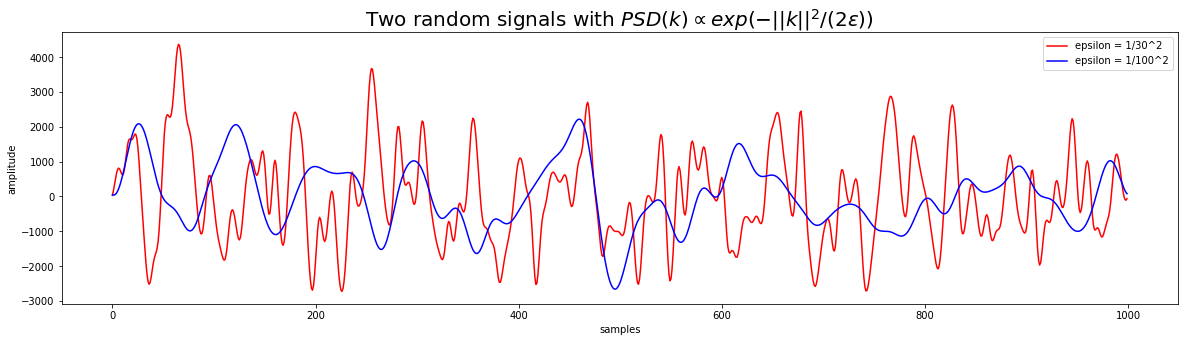

In [5]:
# Plot both signals into a single figure.
plt.figure(figsize=(20,5))
plt.plot(signal1, 'r')
plt.plot(signal2, 'b')
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.title("Two random signals with $PSD(k) \propto exp(-||k||^2 / (2 \epsilon))$", fontsize=20)
plt.legend(["epsilon = 1/30^2", "epsilon = 1/100^2"]);

#### How does τ influence the characteristics of the signals?
The greater tau, the smaller epsilon. PSD is proportional to $e^{-\tau}$ so the bigger $\tau$ the stronger PSD decays with increasing frequencies. As a consequence, the signal with greater tau seems to be slower, e.g., it has lower variance and slower dynamics in time.

In [6]:
#  join them into a single 2x1000 matrix X
X = np.vstack((signal1, signal2))
# Compute the joint covariance matrix
C = np.cov(X)
# matrix of second moment
Xdot = np.diff(X)
Cdot = Xdot.dot(Xdot.T)/(Xdot.shape[1])

In [7]:
# solve the Generalised Eigenvalue Problem
w, vr = eig(Cdot, C)
# vector are already normed: 
print([norm(vr[:,i]) for i in range(2)])

[0.9999999999999999, 1.0]


In [8]:
print('w:', np.real(w), 'vr:', vr)

w: [0.03756734 0.00481565] vr: [[-0.99866879 -0.00856813]
 [-0.05158141  0.99996329]]


#### What kind of mixture do you ideally expect given how the data was generated?
Input signals are random vectors, which are independent, so we expect a mixture of orthogonal eigenvectors.

#### What does the empirical mixture look like, judging from the extracted eigenvectors?
The extracted eigenvectors are almost orthogonal, so the empirical mixture is in fact not fully independent.

In [9]:
score += [3,3]; score # So far, so good

array([3., 3.])

In [10]:
np.dot(vr[0],vr[1]) #check whether the eigenvectors are orthogonal

0.042944924643006116

In [11]:
# Repeat task 3 with different signal sample sizes
sample_sizes = np.logspace(1, 5, num=20)
vrs = np.zeros((20,2,2))
for i in range(20):
    w, vrs[i,:] = do_SFA(int(sample_sizes[i]))

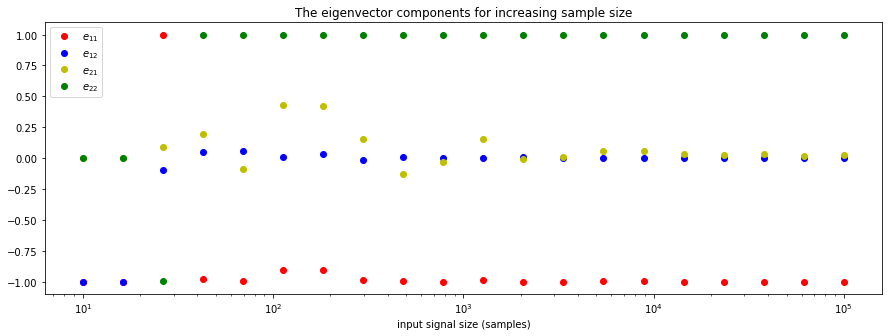

In [12]:
plt.figure(figsize=(15,5))
plt.plot(sample_sizes, vrs[:,0,0],'ro')
plt.plot(sample_sizes, vrs[:,0,1],'bo')
plt.plot(sample_sizes, vrs[:,1,0],'yo')
plt.plot(sample_sizes, vrs[:,1,1],'go')
plt.legend(['$e_{11}$', '$e_{12}$', '$e_{21}$', '$e_{22}$'])
plt.xlabel('input signal size (samples)')
plt.xscale('log')
plt.title("The eigenvector components for increasing sample size");

###  How does the SFA-mixture change depending on the length of the input signal? Can you give an intuition why?
Only the first component of the second eigenvector ($e_{21}$, green) changes with the sample size. The bigger sample
size, the more orthogonal are eigenvectors. It is because the increasing length of the input signals decreases the correlation between those signals (they were ganerated from random numbers). When the input signals are ideally
independent, then the eigenvectors are strictly orthogonal.

### How do the eigenvalues depend on the τ’s that you chose?
The relationship between the $\tau$ and the eigenvalues is: the larger $\tau$, the smaller is the corresponding eigenvalue. $\tau$ value is proportional to the amount of low frequencies in the input signal, which is why larger $\tau$ gives slower signal and consequently smaller eigenvalues.

In [13]:
score += [2.5,3]; score # The relationship is: tau1**2/tau2**2 ~ e1/e2

array([5.5, 6. ])

the ration of the epsilons is gonna to detemrine the ration of the eigenvalues: 
$$
\frac{\tau_1^2}{\tau_2^2} \propto \frac{e_1}{e_2}
$$

### Exercise 2: SFA on a high-dimensional correlated signal

In [14]:
# Generate a 1D-image of length L = 10′000 pixels
img = generate_signal(T=10000, epsilon=0.04)

In [15]:
# Extract a time-dependent receptive field input
l = 100
X = np.array([img[i:i+l] for i in range(9900)]).T
# Make sure that the average input to each pixel of the receptive field is zero
m = np.matlib.repmat(X.mean(axis=1), 9900, 1).T
X = X-m 

In [16]:
# Compute the covariance matrix C of the high-dimensional signal X
C = np.cov(X)
# and the matrix C ̇ of the second moments of its temporal derivative
Xdot = np.diff(X, axis=1)
Cdot = Xdot.dot(Xdot.T)/Xdot.shape[1]

In [17]:
# Solve the Generalised Eigenvalue Problem C ̇w⃗ = λCw⃗
w, W = eig(Cdot, C)
# Extract the 5 slowest eigenvectors 
slowestW = W[:,:5]

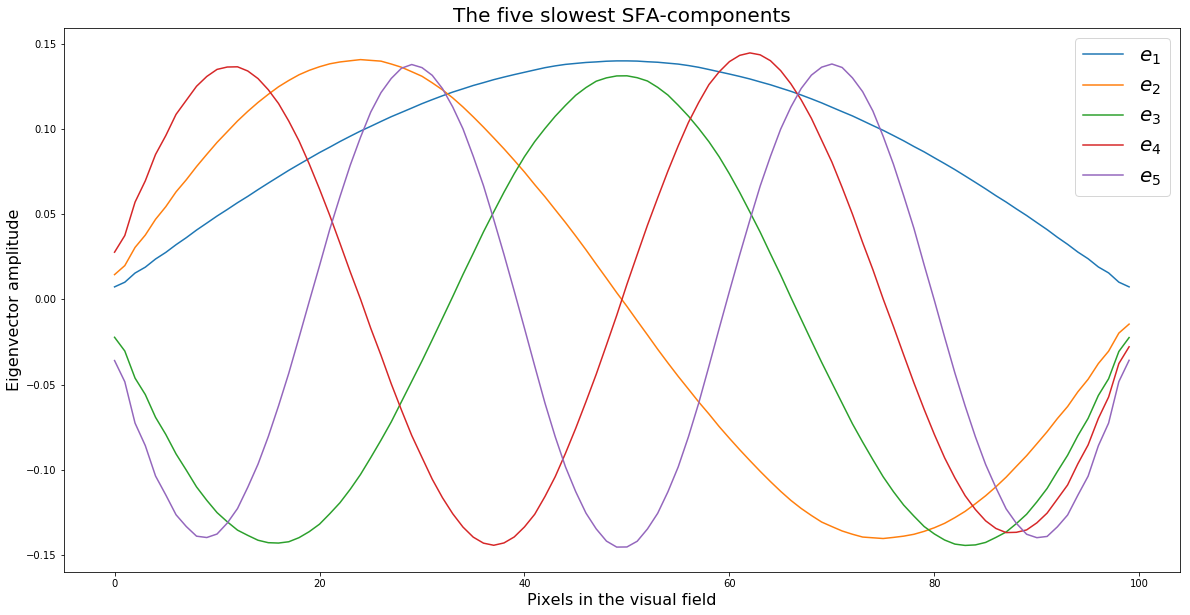

In [18]:
# Plot these eigenvectors
plt.figure(figsize=(20,10))
plt.plot(slowestW)
plt.xlabel("Pixels in the visual field", fontsize=16)
plt.ylabel("Eigenvector amplitude", fontsize=16)
plt.title("The five slowest SFA-components", fontsize=20)
plt.legend(["$e_1$", "$e_2$", "$e_3$", "$e_4$", "$e_5$"], fontsize = 20);

In [19]:
score += [3,3]; score # Great! Best result I've seen this year.

array([8.5, 9. ])

#### How do you interpret the shape of the eigenvectors?
The SFA components have a sinusoidal shapes.  Their slowness is reflected in the frequency of the sinusoidal, e.g., the slowest component (blue) has the lowest frequency and the frequency increases with the index of the eigenvectors sorted w.r.t. slowness. 
#### In which way do the characteristics of the eigenvectors correspond to the intentions underlying SFA?
SFA is supposed to represent the input signal by slowly varying features. The five slowest eigenvectors represent these features because they are varying slowly over the range of the receptive field. 

#### Discuss the properties of the eigenvectors at the boundaries of the receptive fields 
At the boundaries of the receptive field, e.g., at the beginning and the end of the eigenvectors plotted above, the values seems deviate slightly from the pure sinusoidal shape. Additionally, they seem to approach zero, so that the output of the components at the boundaries of the receptive fields is very small. 

#### How does the shape of these eigenvectors relate to the structure of the receptive fields in primary visual cortex V1?
The receptive fields of neurons in V1 are usually tuned in a way that the neuron is selective for edges or gratings. The shape of the eigenvectors plotted above seems to fulfil exactly this criterion: The sinusoidal shape reflects the selectivity for a grating stimulus. 

In [20]:
score += [2.5,3]; score # Boundaries are near zero otherwise they would strongly respond to edges

array([11., 12.])

/Users/Jan/anaconda3/envs/teaching/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


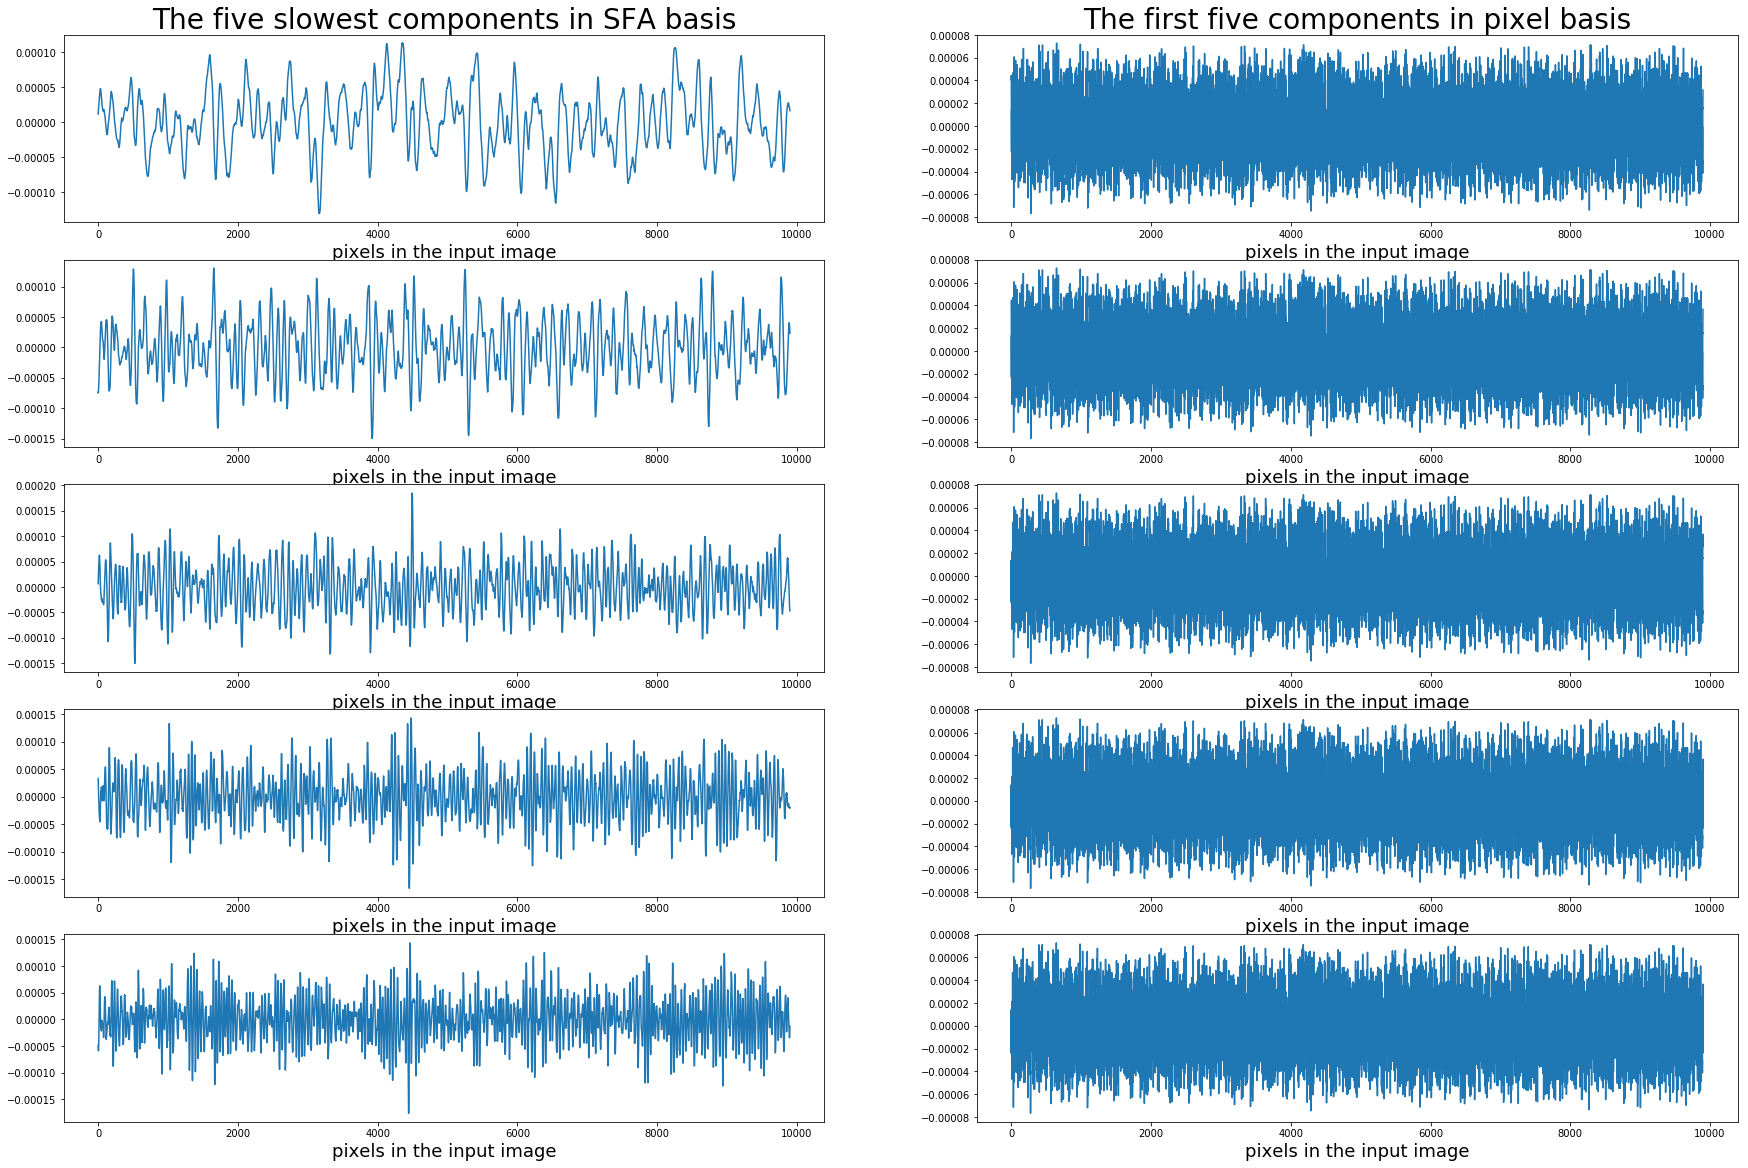

In [21]:
# project the original signal onto the new SFA-basis
Y = W.T.dot(X)
# Plot the five slowest components of the SFA-signal into a single graph
plt.figure(figsize=(30,20))
plt.subplot(521)
plt.title("The five slowest components in SFA basis", fontsize=28)
for i in range(5): 
    plt.subplot(5,2,2*i+1)
    plt.plot(Y[i,:].T)
    plt.xlabel('pixels in the input image', fontsize=18)
# compare the pixel basis
plt.subplot(522)
plt.title("The first five components in pixel basis", fontsize=28)
for i in range(5): 
    plt.subplot(5,2,2*i+2)
    plt.plot(X[i,:].T)
    plt.xlabel('pixels in the input image', fontsize=18)


#### Did the Slow Feature Analysis succeed?
Yes, the five signal plotted in the left panel have much slower dynamics in time than the original signals in the right panel. We also clearly see how the 'slowness' of the signal in the SFA basis increases with the index of the corresponding eigenvector, while the signals in the pixel basis on the right have the same 'slowness' for all indices (noisy input is just shifted by 1 pixel for each row in X matrix). 

In [22]:
score += [1,1]; score

array([12., 13.])

In [23]:
score[0]/score[1] # Excellent work!

0.9230769230769231